In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import utils
import evaluations
import matplotlib.pyplot as plt

# Task 1 : KNN with 4 features

### loading 30s dataset

In [2]:
df = utils.task3_df()
df

,zero_cross_rate_mean,spectral_rolloff_mean,mfcc_1_mean,tempo,Type,GenreID
0,0.131656,5351.909304,9.675074,117.453835,Train,0
1,0.099747,6839.566975,-63.635056,107.666016,Train,0
2,0.096015,6873.341771,-119.346458,161.499023,Train,0
3,0.183106,7534.996104,-26.936581,117.453835,Train,0
4,0.161897,7879.044023,-8.531343,129.199219,Train,0
...,...,...,...,...,...,...
985,0.047769,1838.497216,-270.312012,95.703125,Test,9
986,0.052424,2730.541822,-190.396072,95.703125,Test,9
987,0.095573,5135.260614,-149.196808,83.354335,Test,9
988,0.058125,4355.815328,-223.030594,161.499023,Test,9


In [3]:
X_train_scaled, y_train, X_test_scaled, y_test = utils.train_val_split(df)

### Begin knn training

In [4]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance')# Fit the classifier to the data
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(weights='distance')

In [5]:
y_pred = knn.predict(X_test_scaled)

### Evaluation

Confusion Matrix

<Axes: >

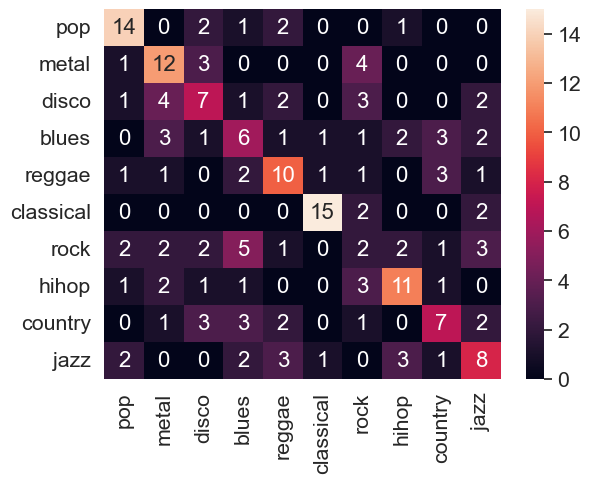

In [6]:
from sklearn.metrics import confusion_matrix

confMatrix = pd.DataFrame(confusion_matrix(y_test, y_pred), utils.genreNames, utils.genreNames)
sn.set(font_scale=1.4)
sn.heatmap(confMatrix, annot=True, annot_kws={"size": 16})

Sensitivity and Specificity for each class

In [7]:
p = evaluations.multiclass_performance_metrics(y_pred,y_test)
p

,tp,tn,fp,fn,F1Score
pop,14,170,8,6,0.666667
metal,12,165,13,8,0.533333
disco,7,166,12,13,0.358974
blues,6,163,15,14,0.292683
reggae,10,167,11,10,0.487805
classical,15,176,3,4,0.810811
rock,2,163,15,18,0.108108
hihop,11,170,8,9,0.564103
country,7,170,9,12,0.400000
jazz,8,166,12,12,0.400000


<BarContainer object of 10 artists>

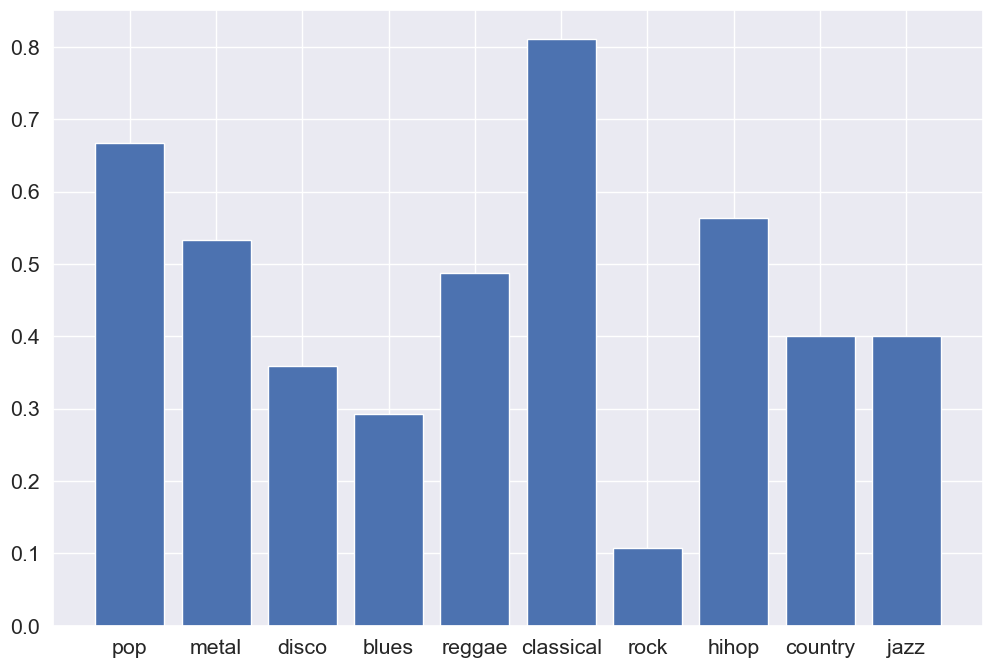

In [8]:
plt.figure(figsize=(12,8))
plt.bar(utils.genreNames, p.F1Score )